In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import os
import sys

In [35]:
# Add the utils directory to the Python path
sys.path.append(os.path.abspath('../utils'))

In [36]:
# Import the load_data function
from io_utils import load_data

In [37]:
# Use the load_data function to load the train.csv file
df = load_data('../data/raw/train.csv')

## Basic Information

In [48]:
# Exploratory analysis of train
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [47]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Visualizations

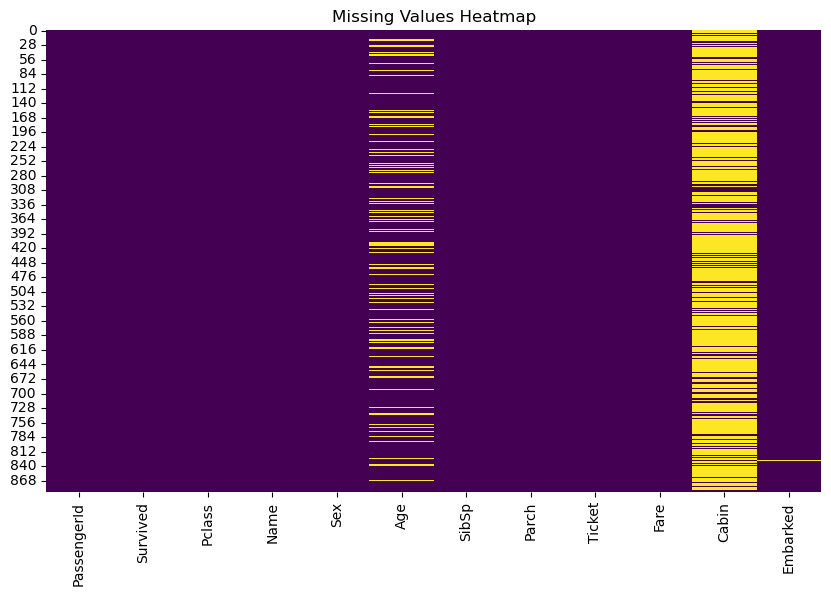

In [49]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

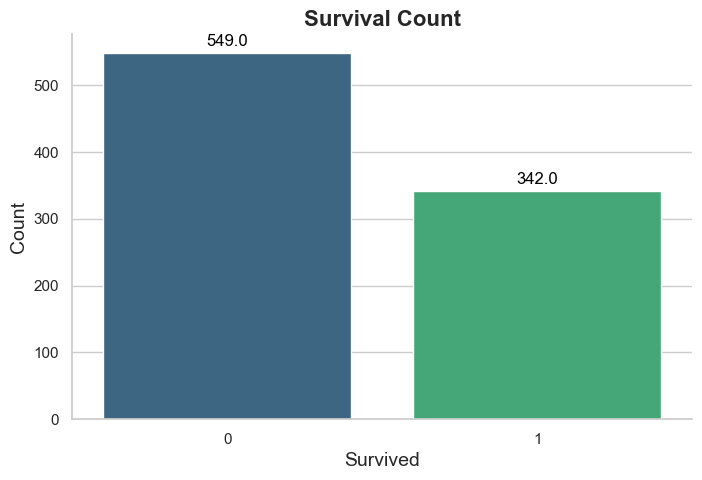

In [53]:
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
ax = sns.countplot(x='Survived', data=df, palette='viridis')
ax.set_title('Survival Count', fontsize=16, weight='bold')
# Removing the top and right spines
sns.despine()
# Adding data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'baseline', fontsize=12, color='black', xytext = (0, 5), 
                textcoords = 'offset points')
# Setting axis labels
ax.set_xlabel('Survived', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.show()

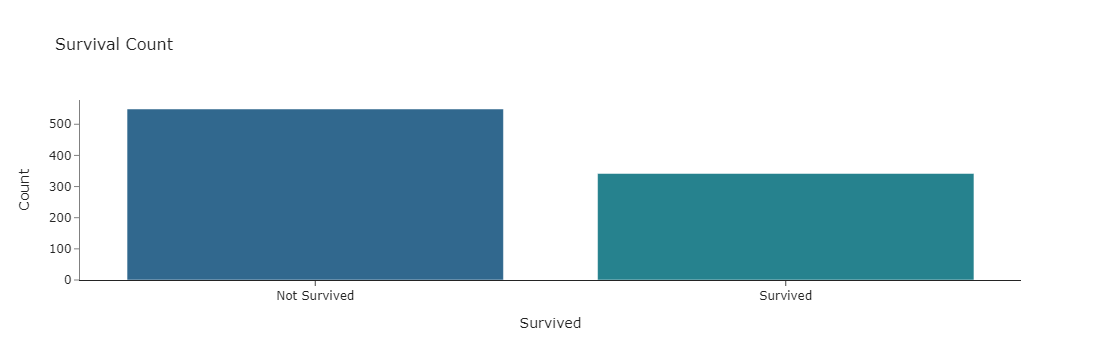

In [75]:
# Ensure the 'Survived' column is treated as a categorical variable
df['Survived'] = df['Survived'].astype(str)

# Count the occurrences of each category
survival_counts = df['Survived'].value_counts().sort_index()

# Define viridis color palette for two categories
colors = px.colors.sequential.Viridis[3:6]

# Create the bar chart
fig = go.Figure()

# Add bars
fig.add_trace(go.Bar(
    x=survival_counts.index,
    y=survival_counts.values,
    marker_color=colors,
))

# Update the layout
fig.update_layout(
    title='Survival Count',
    title_font_size=16,
    xaxis_title='Survived',
    yaxis_title='Count',
    xaxis=dict(
        tickmode='array',
        tickvals=['0', '1'],
        ticktext=['Not Survived', 'Survived']
    ),
    yaxis=dict(
        tickmode='linear',
        tick0=0,
        dtick=100,
        linecolor='gray',
        tickcolor='gray',
        gridcolor='lightgray',  # Adding light gray horizontal grid lines
        zerolinecolor='gray'
    ),
    template='simple_white'
)

# Show the figure
fig.show()

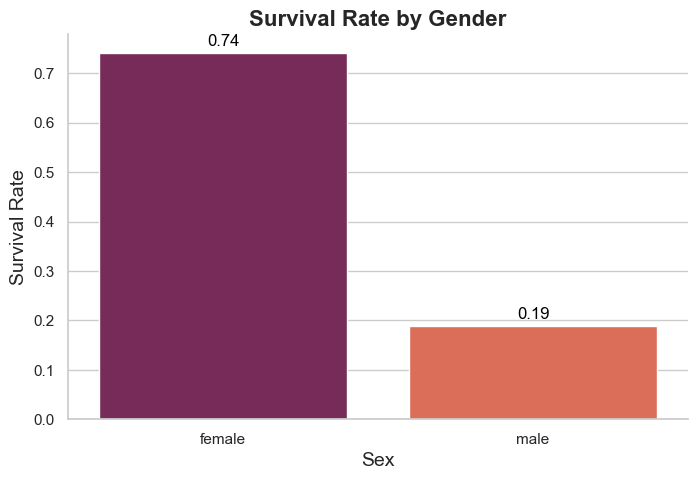

In [84]:
# Ensure 'Sex' is a categorical variable and 'Survived' is numerical
df['Sex'] = df['Sex'].astype('category')
df['Survived'] = df['Survived'].astype('int')

# Create the plot without error bars
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
ax = sns.barplot(x='Sex', y='Survived', data=df, palette='rocket', errorbar=None)
ax.set_title('Survival Rate by Gender', fontsize=16, weight='bold')

# Removing the top and right spines
sns.despine()

# Adding data labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Setting axis labels
ax.set_xlabel('Sex', fontsize=14)
ax.set_ylabel('Survival Rate', fontsize=14)

plt.show()